# Regressione lineare e linearizzazioni

Il confine tra *machine-learning* ed analisi dei dati non è del tutto netto, e sul quel confine troviamo certamente la regressione lineare: un semplice metodo di modellizzazione parametrica di una funzione:
$$
f: \mathbb R^N \to \mathbb R^M
$$

In generale si parla di *regressione* se dato un *set* di variabili $\vec x = \{x_1, x_2, ..., x_N\}$ si cerca un algoritmo in grado di *inferire* o predire il valore di un *set* di variabili $\vec y = \{y_1, y_2, ..., y_M\}$ dato un campione di esempi in cui $x$ e $y$ sono correttamente associati.

La *regressione* diventa una *regressione lineare* se la funzione $f$ è, appunto, rappresentata come un'applicazione lineare. Quindi, se:
 * $\vec x \in \mathbb R^N$
 * $\vec y \in \mathbb R^M$
 * $\mathbf A \in \mathcal M^{M \times N}$
 * $\vec b \in \mathbb R^M$
allora, possiamo parametrizzare $f$ come:
$$
  \vec y = \mathbf A \vec x + \vec b
$$

L'obiettivo è determinare i valori di $\mathbf A$ e $\vec b$ che meglio approssimano un insieme di esempi $\{(\vec x_i, \vec y_i)\}_i$ detto campione di addestramento (o *training sample*).

Senza perdere di generalità, possiamo ridefinire
$$
  \vec x' = (1, x_1, x_2, ..., x_N) \qquad \mathit{et} \qquad \mathbf{\Theta} =
  \left(
    \begin{array}{ccccc}
    b_1 & a_{11} & a_{12} & \cdots & a_{1N} \\
    b_2 & a_{21} & a_{22} & \vdots & a_{2N} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    b_M & a_{M1} & a_{M2} & \vdots & a_{MN} \\
    \end{array}
  \right)
$$

così che possiamo semplificare la scrittura in
$$
\boxed{
\vec y = \mathbf{\Theta} \vec x'
}
$$


Nonostante il limitato potere predittivo, il modello di *regressione lineare* è di grande importanza per diverse ragioni, tra le quali:
 * è un modello **parametrico** in cui i parametri possono assumere un significato fisico;
 * permette di **interpretare** i risultati (è un modello "*white box*");
 * ammette una soluzione analitica;
 * permette di propagare gli errori sulle predizioni in modo semplice;
 * dal punto di vista didattico, consente di introdurre molti degli aspetti degli aspetti comuni ai problemi di regressione affrontati con algoritmi più complessi.

## Dal principio di massima verosimiglianza al metodo dei minimi quadrati

A prescindere dalla forma scelta per la funzione $f$, possiamo scrivere che la distribuzione di probabilità delle variabili $\vec y$ secondo un certo modello $f$ che agisce sulle variabili $\vec x$ ed è determinato da parametri $\vec \theta$ è
$$
p (\vec y\ |\  f (\vec x\ |\
\vec \theta))
$$

Posso allora scrivere la funzione verosimiglianza per il mio campione di *addestramento* come
$$
\mathcal L = \prod_i p (\vec y_i\ |\ f(\vec x_i\ |\ \vec \theta))
$$

> **Assumiamo che sia possibile approssimare la distribuzione di probabilità $p$ come una distribuzione gaussiana multivariata, ossia**

$$
p (\vec y) = \frac{\exp\left[\displaystyle-\frac{1}{2}(\vec y - \vec y_{\mathrm{true}})^\mathrm{T}\mathbf{\Sigma^{-1}} (\vec y - \vec y_{\mathrm{true}})\right]}{\displaystyle \sqrt{(2\pi)^M |\det \mathbf{\Sigma}|}}
$$
dove $\vec y_{\mathrm{true}}$ è la stima ideale del vettore $\vec y$ e $\mathbf \Sigma$ la matrice di covarianza.
Ora, per semplicità di notazione assumeremo che la matrice di covarianza abbia la forma
$$
\mathbf{\Sigma} = \left(
\begin{array}{cccc}
\sigma^2 & 0 & \cdots & 0 \\
0 & \sigma^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma^2 \\
\end{array}
\right) = \sigma^2 \mathbb{I} \in \mathcal M (M \times M)
$$
Questo ci permette di scrivere
$$
\det \mathbf{\Sigma} = \sigma^{2M}
$$
e quindi
$$
p (\vec y) = \frac{\displaystyle\exp\left[-\frac{|\vec y - \vec y_{\mathrm{true}}|^2}{2\sigma^2} \right]}{\displaystyle\sqrt{(2\pi)^M |\sigma^{2M}|}}
$$
Ora, se raccogliamo diverse osservazioni di $\vec y$, indicate come $\vec y_i$, possiamo associare a ciascuna di esse la varianza $\sigma_i$.
Torniamo alla funzione verosomiglianza, sostituendo ad $y_\mathrm{true}$ la nostra stima $f$.

$$
\mathcal L = \prod_i \frac{1}{\sqrt{(2\pi \sigma_i^2)^M}}\exp\left(-\frac{|\vec y_i - f(\vec x_i\ |\ \vec \theta)|^2}{2\sigma_i^2}\right)
$$

Sostituendo la parametrizzazione lineare di $f$ discussa in precedenza, avremo
$$
\mathcal L = \prod_i \frac{1}{\sqrt{(2\pi \sigma_i^2)^M}}\exp\left(-\frac{|\vec y_i -  \mathbf\Theta \vec x'_i|^2}{2\sigma_i^2}\right)
$$

Per il principio di massima verosimiglianza, possiamo stimare i parametri del modello lineare, ossia gli elementi della matrice $\mathbf \Theta$, scegliendoli in modo da massimizzare la funzione verosimiglianza. Ossia
$$
 \hat {\mathbf\Theta} = \mathop{\rm argmax}_{\mathbf \Theta} \  \mathcal L
$$
Ossia
$$
 \hat {\mathbf\Theta} = \mathop{\rm argmax}_{\mathbf \Theta} \left[ \prod_i \frac{1}{\sqrt{(2\pi \sigma_i^2)^M}}\exp\left(-\frac{|\vec y_i -  \mathbf\Theta \vec x'|^2}{2\sigma_i^2}\right) \right]
$$

Ricordando che applicando una funzione monotona, non si modifica la posizione si massimi e minimi, o in simboli
$$
\mathop{\rm argmax}_{\theta} f(\theta) = \mathop{\rm argmax}_{\theta} g(f(\theta)) \qquad \forall \mbox{$g$  monotona}
$$
e considerando che la funzione logaritmo è monotona, posso scrivere
$$
 \hat {\mathbf\Theta} = \mathop{\rm argmax}_{\mathbf \Theta}\ \log \left[ \prod_i \frac{1}{\sqrt{(2\pi \sigma_i^2)^M}}\exp\left(-\frac{|\vec y_i -  \mathbf\Theta \vec x'_i|^2}{2\sigma_i^2}\right) \right]
$$

$$
 \hat {\mathbf\Theta} = \mathop{\rm argmax}_{\mathbf \Theta} \left[ \sum_i\left(-\frac{|\vec y_i -  \mathbf\Theta \vec x'_i|^2}{2\sigma_i^2}\right) - \frac{1}{2M}\log (2\pi \sigma_i^2) \right]
$$

Il secondo termine è costante rispetto a $\Theta$ e può dunque essere ignorato nella ricerca del massimo. Allo stesso tempo possiamo trasformare il problema in una ricerca del minimo della funzione cambiata di segno, così da scrivere

$$
 \hat {\mathbf\Theta} = \mathop{\rm argmin}_{\mathbf \Theta}\frac{1}{2} \sum_i\frac{|\vec y_i -  \mathbf\Theta \vec x'_i|^2}{\sigma_i^2}
$$

> Si noti che fino a qui non abbiamo utilizzato l'ipotesi della linearità di $f$.

Chiamando
$$
\chi^2 = \sum_i \frac{|\vec y_i - \mathbf \Theta \vec x'_i|^2}{\sigma_i^2},
$$
o, più in generale,
$$
\chi^2 = \sum_i \frac{|\vec y_i - f(\vec x_i\ |\ \vec \theta)|^2}{\sigma_i^2},
$$

si riottiene una formula ben nota come [metodo dei minimi quadrati](https://it.wikipedia.org/wiki/Metodo_dei_minimi_quadrati):

$$
 \hat {\mathbf\Theta} = \mathop{\rm argmin}_{\mathbf \Theta} \frac{1}{2}\chi^2
$$
Per semplicità di notazione, definiamo
$$w_i = \frac{1}{\sigma_i^2} \qquad \mbox{e dunque} \qquad \chi^2 = \sum_i w_i(\vec y_i - f(\vec x_i\ |\ \vec \theta))^2$$


## Soluzione analitica della regressione lineare
La ricerca del minimo del $\chi^2$ può essere affrontata ponendo a zero tutte le derivate di $\chi^2$ rispetto ai parametri liberi (gli elementi di $\mathbf \Theta$) e risolvendo il sistema che ne risulta.
$$
\frac{\partial\chi^2}{\partial\theta_{m\ell}} = 0\qquad \forall m, \ell
$$
Sostituendo a $\chi^2$ la sua espressione otteniamo
$$
\frac{\partial}{\partial\theta_{m\ell}} \sum_i w_i |\vec y_i - \mathbf \Theta \vec x_i'|^2 = 0
$$
Esplicitando gli indici del vettore $\vec y_i$ nel modulo-quadro e nel prodotto $\mathbf \Theta \vec x_i'$,
$$
\frac{\partial}{\partial\theta_{m\ell}} \sum_i w_i\, \sum_j \left(y_{ij} - \sum_k \theta_{jk} x_{ik}'\right)^2 = 0
$$
Derivando,
$$
2\sum_i w_i  \sum_j\left(y_{ij} - \sum_k \theta_{jk} x_{ik}'\right)\sum_kx'_{ik}\delta_{mj}\delta_{\ell k} = 0
$$
dove $\delta$ è il simbolo di Kronecker, che compare due volte ed in entrambi i casi può essere rimosso insieme alla relativa somma, per ottenere
$$
2\sum_i w_i  \left(y_{im} - \sum_k \theta_{mk} x_{ik}'\right)x'_{i\ell} = 0
$$
da cui
$$
\sum_i w_i \sum_k \theta_{mk} x_{ik}'x'_{i\ell} = \sum_i w_i  y_{im} x'_{i\ell}
$$
Riorganizzando il primo membro
$$
\sum_k  \sum_i w_i  x'_{i\ell} x_{ik}'\theta_{mk} = \sum_i w_i  y_{im} x'_{i\ell}
$$
che, in forma matriciale, può essere scritto come
$$
\mathbf C \mathbf \Theta^\mathsf T = \mathbf D
$$
purché
$$
\mathbf C = \left\{\sum_i w_i x'_{i\ell}x'_{ik}\right\}_{\ell k} \qquad et \qquad \mathbf D = \left\{\sum_i w_i y_{im}x'_{i\ell}\right\}_{\ell m}
$$


Da cui
$$
\mathbf \Theta^\mathsf T = \mathbf C^{-1} \mathbf D
$$

Ossia
$$
\boxed{
  \hat{\mathbf\Theta} = \left(\mathbf C^{-1} \mathbf D\right)^\mathsf T
}
$$

dove abbiamo reinserito il cappelletto per indicare che questa soluzione, ottenuta minimizzando il $\chi^2$, è anche lo stimatore dei parametri $\mathbf\Theta$.

Questo risultato è molto importante perché ci dice che:
 1. possiamo ottenere analiticamente (ossia senza una procedura di ottimizzazione numerica) il valore della matrice $\mathbf \Theta$ che minimizza il $\chi^2$ esprimendola come un semplice prodotto
 2. la soluzione richiede l'inversione di una matrice $\mathbf C \in \mathcal M^{N\times N}$, dove $N$ è la dimensionalità di $\vec x$, ossia il numero di variabili *note* del nostro problema di regressione.

## Verifica "sperimentale"

Siamo pronti per mettere alla prova la formula derivata sopra.

Per farlo costruiremo un dataset casuale con una dipendenza lineare nota e cercheremo di ricostruirla applicando la formula discussa sopra.

Per prima cosa, importiamo le librerie `numpy` e `matplotlib` che ci servono per il calcolo numerico e per produrre qualche plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Seguendo la notazione usata nel paragrafo precedente, definiamo il tensore $x_{i\ell}$ per le variabili di *input* ed il tensore $y_{im}$ per le variabili di output. Il primo indice di $x_{i\ell}$ e $y_{im}$, $i$, corre sul numero di osservazioni; il secondo indice di $x_{i\ell}$, $\ell$, corre sul numero di variabili di input, mentre il secondo indice del tensore $y_{im}$ corre sul numero variabili di output.

Fissiamo sia il numero di variabili in input sia il numero di variabili in output a 2. Scritto in forma esplicita, il problema che stiamo studiando è dunque
$$
\left\{
  \begin{array}{l}
  y_1 = a_{11} x_1 + a_{12} x_2 + b_{1} \\
  y_2 = a_{21} x_1 + a_{22} x_2 + b_{2} \\
  \end{array}
  \right.
$$
Il nostro obiettivo è quello di determinare $a_{11}$, $a_{12}$, $a_{21}$, $a_{22}$, $b_{1}$ e $b_{2}$ dato un set di osservazioni
$(x_{i1}, x_{i2}, y_{i1}, y_{i2})$ che organizziamo appunto in due tensori

Il numero di eventi raccolti sarà:

In [ ]:
n_samples = 100

Scegliamo per le variabili $x_1$ e $x_2$ dei numeri random distribuiti in modo uniforme rispettivamente tra 0 e 1 e tra 1 e 2.

In [ ]:
x_1 = np.random.uniform(0, 1, n_samples)
x_2 = np.random.uniform(1, 2, n_samples)
x = np.c_[x_1, x_2]

Costruiamo il tensore $x'$ aggiungendo una colonna di 1 a sinistra della matrice $x_{i\ell}$:

In [ ]:
ones = np.ones_like(x_1)
x_p = np.c_[ones, x]

print(x_p[:5])

[[1.         0.75112361 1.72636996]
 [1.         0.33228232 1.69829876]
 [1.         0.55167167 1.04958971]
 [1.         0.51942953 1.6812217 ]
 [1.         0.76719075 1.77277965]]


Costruiamo la matrice $\mathbf\Theta$ vera, che poi cercheremo di riottenere con l'applicazione di una regressione lineare.

In [ ]:
theta_true = np.array([[1, 2, 3],
                       [4, 5, 6]])

Definiamo i pesi, che per semplicita assumeremo essere tutti uguali a 10:
$$
w_i = 10\qquad \forall i
$$
Segue che
$$
\sigma_i = \frac{1}{\sqrt {10}} \forall i
$$

In [ ]:
w = np.full_like (x_1, 10)
sigma = np.sqrt(1/w)

Quindi otteniamo i valori delle variabili $y$ che immaginiamo di aver raccolto sperimentalmente come numeri casuali distribuiti secondo una gaussiana centrata in
$$
y_{true} = \mathbf \Theta x'
$$

Si noti che è necessaria un'operazione di trasposizione del tensore $x'_{i\ell}$ per portare l'indice $\ell$ che va contratto con $\mathbf \Theta$ in prima posizione, al posto di $i$ (che corre sul numero di osservazioni).

In [ ]:
y = np.random.normal (theta_true @ x_p.T, sigma).T

print (theta_true.shape, x.T.shape, '->', y.shape)

(2, 3) (2, 100) -> (100, 2)


Definiamo allora le matrici $\mathbf C$ e $\mathbf D$ seguendo le formule derivate sopra, prestando attenzione all'ordine degli indici.
$$
\mathbf C = \left\{\sum_i w_i x'_{i\ell}x'_{ik}\right\}_{\ell k} \qquad et \qquad \mathbf D = \left\{\sum_i w_i y_{im}x'_{i\ell}\right\}_{\ell m}
$$


In [ ]:
C = np.array([[
    np.sum(w * x_p[:,ell] * x_p[:,k])
  for k in range(3)]
for ell in range(3)])

D = np.array([[
     np.sum(w * x_p[:,ell] * y[:,m])
   for m in range(2)]
 for ell in range(3)])

Ed infine invertiamo $\mathbf C$ e applichiamo la formula per stimare $\hat{\mathbf \Theta}$.
$$
\boxed{
  \hat{\mathbf\Theta} = \left(\mathbf C^{-1} \mathbf D\right)^\mathsf T
}
$$


In [ ]:
theta_hat = (np.linalg.inv(C) @ D).T

print (theta_hat)

[[0.98463643 1.99674625 3.00526496]
 [3.75746895 5.20015076 6.1218793 ]]


Il risultato che otteniamo è compatibile con $\mathbf \Theta_{\mathrm{true}}$ che abbiamo scelto all'inizio del problema.
Le piccole differenze sono da imputarsi agli errori di misura che noi abbiamo racchiuso nella definizione $\sigma$.
Riducendo $\sigma$ o aumentando il numero di osservazioni `n_samples` i valori ottenuti per lo stimatore $\hat{\mathbf \Theta}$ si avvicinano ai valori di $\mathbf \Theta_{\mathrm{true}}$ (si veda anche il concetto *consistenza dello stimatore di massima verosimiglianza*).

## L'equazione normale (normal equation)

Nel caso speciale in cui $w_i$ sia costante per ogni $i$ è possibile semplificare la scrittura di $\mathbf C$ e $\mathbf D$.

Definiamo i tensori $\mathbf X$ e $\mathbf Y$ che rappresentino il training sample.
$$
\mathbf X = \{x_{ij}\}_{ij} \qquad \mathit{et} \qquad \mathbf Y = \{y_{ij}\}_{ij}
$$
dove il primo indice, $i$, corre sull'esempio del campione di training, mentre il secondo, $j$, corre sulla variabile di input, nel caso di $\mathbf X$, o di output, nel caso di $\mathbf Y$.

Con queste definizioni, possiamo riscrivere l'equazione per $\hat {\mathbf \Theta}$ come
$$\boxed{
\hat{\mathbf\Theta}^T = (\mathbf X^\mathsf T \mathbf X)^{-1}\  \mathbf X^\mathsf T \mathbf Y
}
$$

Questa equazione prende il nome di **Equazione normale** (o ***normal equation*** in inglese) e sta alla base di molti metodi di soluzione analitica di problemi di ottimizzazione.

# La regressione lineare con `scikit-learn`

La regressione lineare può essere affrontata allo stesso modo utilizzando `scikit-learn`, una libreria del Python Package Index che contiene le implementazioni di svariate tecniche di machine learning.

Per prima cosa, importiamo dal modulo `linear_model` di `scikit-learn` la classe `LinearRegression`.

In [ ]:
from sklearn.linear_model import LinearRegression

Quindi istanziamo la classe `LinearRegression` che implementa i metodi `fit` e `predict` che consentono di costruire un modello lineare una relazione
$f: \mathbb R^\mathrm N \to \mathbb R^\mathrm M$ senza descrivere le operazioni tra tensori in modo esplicito.

In particolare, il metodo `fit` prende come argomento due tensori a due indici in cui il primo indice corre sul numero di esempio parte del campione di addestramento (che abbiamo chiamato $i$ negli esempi sopra) ed il secondo che corre sulla variabile. Il primo tensore rappresenta le variabili di input ($x$), il secondo le variabili di output ($y$).

Facoltativamente, è possibile passare il vettore dei pesi che, come abbiamo visto, può essere ottenuto dall'incertezza con cui conosciamo la misura associata a ciascun esempio.

Si noti l'utilizzo della funzione speciale [`np.c_`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) usata in generale per comporre un array per colonne. In questo caso componiamo il tensore delle variabili di input passando i due array associati alla prima e alla seconda componente di $\vec x$:
$$
  \vec x_i = \{x_{ij}\}_{ij} = \mathtt{np.c\_}[\{x_{i1}\}_i,\{x_{i2}\}_i]
$$

In [ ]:
lm = LinearRegression()
lm.fit(np.c_[x_1, x_2], y, sample_weight=w)

LinearRegression()

Infine, siamo pronti per confrontare i risultati ottenuti con `scikit-learn` con quelli otteuti, per lo stesso *dataset* calcolando esplicitamente lo stimatore $\hat {\mathbf \Theta}$.

Una volta chiamata la funzione `fit`, la classe `LinearRegression` espone due variabili membro chiamate `intercept_` e `coef_` che contengono gli stimatori per le matrici che noi abbiamo chiamato rispettivamente $\vec b$ e $\mathbf A$.
Seguendo quanto discusso sopra, possiamo ricostruire la matrice $\hat {\mathbf \Theta}$ usando come prima colonna $\vec b$ seguita dalle colonne di $\mathbf A$. Ossia:

In [ ]:
theta_hat_sk = np.c_ [lm.intercept_, lm.coef_]

print (theta_hat_sk)

[[0.98463643 1.99674625 3.00526496]
 [3.75746895 5.20015076 6.1218793 ]]


Confrontando la soluzione ottenuta utilizzando `scikit-learn` con la soluzione ottenuta con il calcolo esplicito discusso sopra, otteniamo differenze dell'ordine di $10^{-14}$, compatibili con errori derivanti dal calcolo *floating point* ed in particolare dall'operazione inversione di matrice.

In [ ]:
theta_hat_sk - theta_hat

array([[-4.03010958e-14,  7.54951657e-15,  5.55111512e-14],
       [-5.63993297e-14, -9.76996262e-15,  4.35207426e-14]])

Utilizzando la funzione `predict`, poi, possiamo calcolare la predizione del modello lineare per ciascun valore del campione di addestramento e confrontarla con il valore misurato. I valori così ottenuti, in gergo, sono chiamati **residui**.

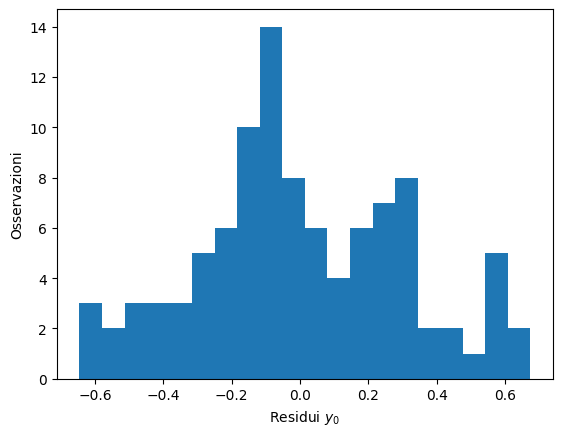

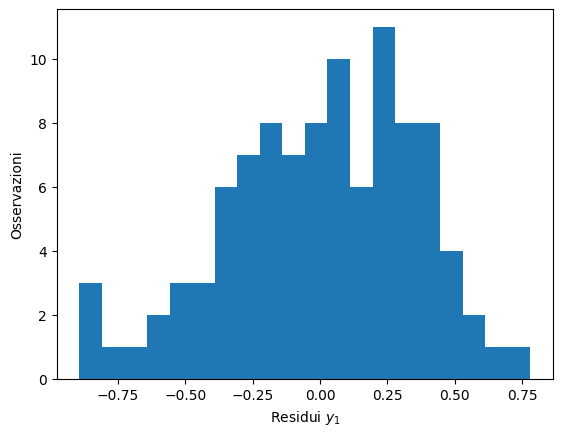

In [ ]:
y_hat = lm.predict(np.c_[x_1, x_2])

plt.hist (y_hat[:,0] - y[:,0], bins = 20)
plt.xlabel ("Residui $y_0$")
plt.ylabel ("Osservazioni")
plt.show()

plt.hist (y_hat[:,1] - y[:,1], bins = 20)
plt.xlabel ("Residui $y_1$")
plt.ylabel ("Osservazioni")
plt.show()

# Regressione lineare con `iminuit`

Un metodo alternativo e più generale per affrontare la regressione lineare è l'ottimizzazione numerica della funzione di verosimilianza, o, per errori gaussiani sulle variabili dipendenti (*y*), la funzione $\chi^2$.

Esistono svariati pacchetti per ottimizzare funzioni in modo numerico, qui utilizzeremo `iminuit`, l'interfaccia interattiva a Minuit, software di ottimizzazione sviluppato al CERN e tutt'ora ampiamente utilizzato per le analisi in fisica delle alte energie.

Minuit non è installato in colab per default, quindi dovremo installarlo dal Python Package Index prima di poterlo importare nel nostro notebook.

In [ ]:
!pip install iminuit
from iminuit import Minuit

Per autoconsistenza, rigeneriamo il dataset "sperimentale" su cui esercitarci,
partendo dalla stessa matrice $\mathbf{\Theta}$ usata in precedenza.

In [ ]:
theta_true = np.array([[1, 2, 3],
                       [4, 5, 6]])

n_samples = 100
sigma = 0.1
x = np.c_[np.random.uniform(0, 1, n_samples), np.random.uniform(1, 2, n_samples)]
x_p = np.c_[np.ones(n_samples), x]
y = np.random.normal (theta_true @ x_p.T, sigma).T

Definiamo la funzione del modello, in questo caso è semplicemente il prodotto matriciale $\Theta x'$, ma potrebbe essere una funzione arbitrariamente complessa, definita da parametri passati come argomenti.

In [ ]:
def model(x, theta):
  return (theta @ x.T).T

Definiamo quindi la funzione da minimizzare, nel nostro caso utilizzermo il cosiddetto *Mean Squared Error*, errore quadratico medio, che è uguale al $\chi^2$ se $\sigma_i = 1\ \forall i$.

Si noti che la funzione costo, deve dipendere *unicamente* dai parametri rispetto ai quali minimizzare. Le variabili dipendenti e indipendenti che costituiscono il dataset sono definite come variabili globali e non vengono passate come argomenti.

In [ ]:
def mse(a11, a12, a21, a22, b1, b2):
  theta = np.c_[[b1, b2], [a11, a21], [a12, a22]]
  return np.sum(np.square(y - model(x_p, theta)))

Infine, passiamo la funzione a Minuit insieme ai valori iniziali (o *guess*) per i parametri che la definiscono.

Scegliamo la definizione di errore (tipicamente 0.5 se stiamo minimizzando una *negative log likelihood*, oppure 1 se stiamo minimizzando un $\chi^2$. In questo caso stiamo minimizzando un MSE quindi l'errore in ogni caso non sarà definito correttamente).

E infine avviamo la minimizzazione con l'algoritmo [MIGRAD](https://root.cern.ch/doc/master/classTMinuit.html), che stima la posizione del minimo dal gradiente della funzione di costo.

Per funzioni costo in cui il gradiente non è ben definito, si può utilizzare SIMPLEX (con il metodo `.simplex()`).

In [ ]:
m = Minuit(mse, a11=1, a12=1, a21=1, a22=1, b1=0, b2=0)
m.errordef = 1

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.884                      │              Nfcn = 119              │
│ EDM = 8.66e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a11  │    2.0    │    0.4    │            │            │         │         │       │
│ 1 │ a12  │   3.00    │   0.34    │            │            │         │         │       │
│ 2 │ a21  │    5.0    │    0.4    │            │            │         │         │       │
│ 3 │ a22  │   6.02    │   0.34    │            │            │         │         │       │
│ 4 │ b1   │    1.0    │    0.5    │            │            │         │         │       │
│ 5 │ b2   │    4.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────┐
│     │   a11   a12   a21   a22    b1    b2 │
├─────┼─────────────────────────────────────┤
│ a11 │ 0.156 -0.03  0.00  0.00 -0.03 -0.00 │
│ a12 │ -0.03 0.119 -0.00  0.00 -0.16 -0.00 │
│ a21 │  0.00 -0.00 0.156 -0.03  0.00 -0.03 │
│ a22 │  0.00  0.00 -0.03 0.119 -0.00 -0.16 │
│  b1 │ -0.03 -0.16  0.00 -0.00 0.247  0.00 │
│  b2 │ -0.00 -0.00 -0.03 -0.16  0.00 0.247 │
└─────┴─────────────────────────────────────┘

Infine confrontiamo i risultati ottenuti con la regressione numerica con quelli ottenuti utilizzando scikit-learn, che implementa l'algoritmo analitico.

In [ ]:
from IPython.display import Markdown
display(Markdown(r"""
$$
\vec b_{\mathrm{minuit}} = \left(
  \begin{array}{c}
    %(b1).2f \\
    %(b2).2f\\
  \end{array}
  \right)
\qquad
\mathbf{A}_{\mathrm{minuit}} = \left(
  \begin{array}{cc}
    %(a11).2f & %(a12).2f \\
    %(a21).2f & %(a22).2f \\
  \end{array}
  \right)
$$
""" % dict(**{k: m.values[k] for k in ('a11', 'a12', 'a21', 'a22', 'b1', 'b2')})))

from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x, y)
a_ = lr.coef_
b_ = lr.intercept_

display(Markdown(r"""
$$
\vec b_{\mathrm{sklearn}} = \left(
  \begin{array}{c}
    %(b1).2f \\
    %(b2).2f\\
  \end{array}
  \right)
\qquad
\mathbf{A}_{\mathrm{sklearn}} = \left(
  \begin{array}{cc}
    %(a11).2f & %(a12).2f \\
    %(a21).2f & %(a22).2f \\
  \end{array}
  \right)
$$
""" % dict(a11=a_[0, 0], a12=a_[0, 1], a21=a_[1, 0], a22=a_[1, 1], b1=b_[0], b2=b_[1])))


$$
\vec b_{\mathrm{minuit}} = \left(
  \begin{array}{c}
    1.01 \\
    3.99\\
  \end{array}
  \right)
\qquad
\mathbf{A}_{\mathrm{minuit}} = \left(
  \begin{array}{cc}
    1.98 & 3.00 \\
    5.00 & 6.02 \\
  \end{array}
  \right)
$$



$$
\vec b_{\mathrm{sklearn}} = \left(
  \begin{array}{c}
    1.01 \\
    3.99\\
  \end{array}
  \right)
\qquad
\mathbf{A}_{\mathrm{sklearn}} = \left(
  \begin{array}{cc}
    1.98 & 3.00 \\
    5.00 & 6.02 \\
  \end{array}
  \right)
$$


## Regressione polinomiale
Utilizzando l'equazione normale, possiamo tentare di risolvere problemi non lineari rappresentando come variabili indipendenti le potenze delle variabili di input. In questo modo aumentiamo artificiosamente la dimensionalità del problema per trarre profitto dall'osservazione che è più semplice risolvere un problema lineare in molte variabili che risolvere un problema non-lineare in poche variabili.

Per fare un esempio, proviamo a utilizzare un modello lineare per rappresentare la funzione
$$
y = \cos(x)
$$
ipotizzando di conoscere 100 coppie di punti $(x,y)$ con un'incertezza su $y$ pari a $\pm 0.1$.

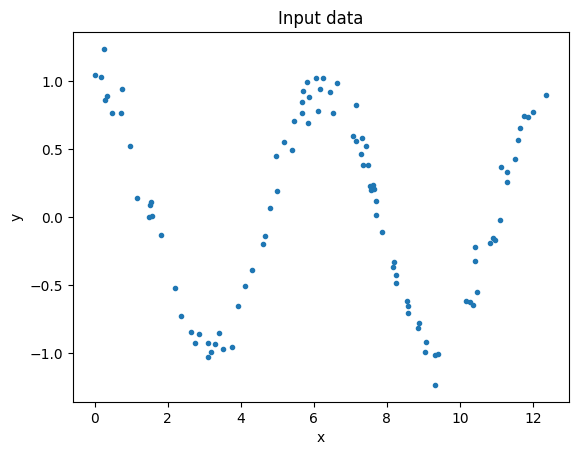

In [ ]:
x = np.random.uniform (0, 4*np.pi, 100)
y = np.random.normal (np.cos(x), 0.1)

plt.plot(x, y, '.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Input data")
plt.show()

Chiaramente, utilizzando una semplice regressione lineare otterremo una retta che approssima l'asse delle ascisse. Possiamo però definire un nuovo dataset mappando la variabile di input $x$ in un vettore di variabili di input
$$
 \mathbf X = \{x_i^j\}_{i,j} \quad \mathrm{per\ } j = 1, 2, ..., k
$$
in cui il primo indice corre sul campionamento $(x_i, y_i)$ ed il secondo viene utilizzato come esponente dell'elevamento a potenza di $x_i$.

Osservando che la funzione coseno è una funzione pari, possiamo rinunciare a tutte le potenze dispari.

Vediamo come migliora la qualità del modello polinomiale all'aumentare di $k$.

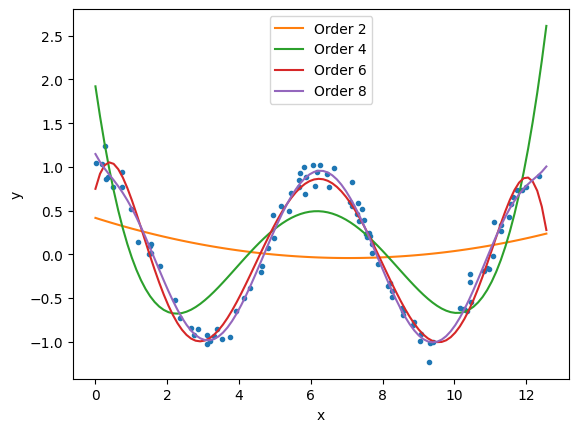

In [ ]:
plt.plot(x, y, '.')

for order in range(2, 9, 2):
  powers_of_x = [x**i for i in range(1,order+1)]
  X = np.array (powers_of_x).T
  lm = LinearRegression().fit (X, y)

  xAxis = np.linspace(0, 4*np.pi, 100)
  y_hat = lm.predict(np.array([xAxis**i for i in range(1,order+1)]).T)

  plt.plot(xAxis, y_hat, label=f'Order {order}')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

### Limiti del modello polinomiale
#### Estrapolazioni
Per quanto semplice e veloce, il modello polinomiale è del tutto inadeguato nelle *estrapolazioni*, cioè nelle valutazioni della funzione al di fuori dell'intervallo in cui si collocano i valori del campione di addestramento.

Prendiamo ad esempio il caso di $k=8$ che descrive piuttosto bene il nostro campione di training definito nell'intervallo $[0, 4\pi]$ e valutiamolo fino a $4.2\pi$. Il risultato è quanto mai deludente: si perde persino il comportamento oscillatorio.

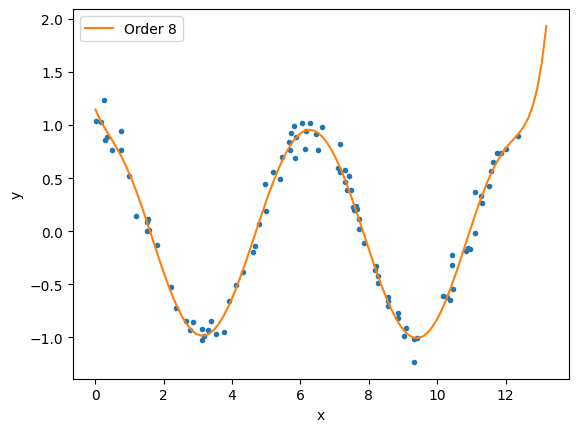

In [ ]:

plt.plot(x, y, '.')

order = 8
powers_of_x = [x**i for i in range(1,order+1)]
X = np.array (powers_of_x).T
lm = LinearRegression().fit (X, y)

xAxis = np.linspace(0, 4.2*np.pi, 100)
y_hat = lm.predict(np.array([xAxis**i for i in range(1,order+1)]).T)

plt.plot(xAxis, y_hat, label=f'Order {order}')

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

#### Errori numerici nell'inversione di matrice
Alla base del metodo lineare c'è una inversione di matrice. Se la matrice da invertire è quasi singolare, gli errori numerici nell'inversione diventano molto importanti e possono pregiudicare la qualità del modello ottenuto dal fit.
Una matrice è singolare, ad esempio, se un'intera riga o colonna è zero. Se una delle variabili $x$ è molto più grande delle altre, allora la riga di coefficienti corrispondente sarà molto piccola e spingerà la matrice $\mathbf C$ verso una condizione di singolarità, rendendone più difficoltosa l'inversione.

Questo problema nasce chiaramente anche nel caso delle regressioni polinimiali poiché il risultato ottenuto elevando a potenze grandi la variabile $x$ può essere molto più grande o molto più piccolo di $x$.

Si può mitigare questo problema riscalando il set di variabili $\mathbf X$ in modo che abbiano tutte media 0 e deviazione standard 1. Questa operazione, che in scikit-learn prende il nome di *standard scaling* consente di ridurre i problemi numerici che insorgono nelle ottimizzazioni (in questo caso basate sull'inversione di una matrice, ma il principio è vero in generale).

Vediamo un esempio.

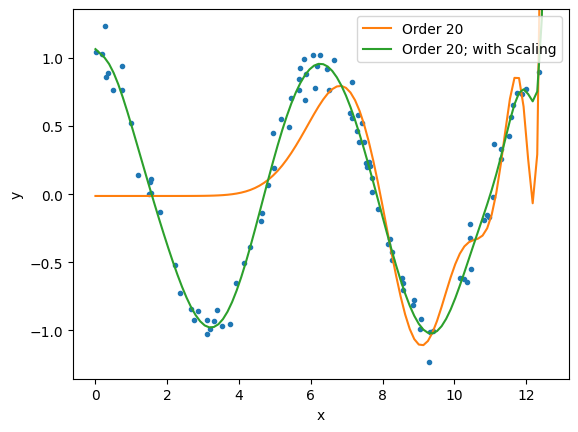

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.plot(x, y, '.')
ylim = plt.ylim()

order = 20
powers_of_x = [x**i for i in range(1,order+1)]
X = np.array (powers_of_x).T
lm = LinearRegression().fit (X, y)
lm_std = Pipeline( [('scaler', StandardScaler()), ('regression', LinearRegression())])
lm_std.fit (X, y)

xAxis = np.linspace(0, 4*np.pi, 100)
y_hat = lm.predict(np.array([xAxis**i for i in range(1,order+1)]).T)
y_hat_std = lm_std.predict(np.array([xAxis**i for i in range(1,order+1)]).T)

plt.plot(xAxis, y_hat, label=f'Order {order}')
plt.plot(xAxis, y_hat_std, label=f'Order {order}; with Scaling')

plt.ylim(ylim)

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

#### *Overfitting* o *Overtraining*
Se aumentiamo eccessivamente l'ordine del polinomio utilizzato per il fit, anche lo scaling non è sufficiente a mitigare i problemi numerici e osserviamo comportamenti oscillatori molto rapidi.

Alcune di queste oscillazioni sono dovute al fatto che le fluttuazioni statistiche del dataset vengono interpretate dal modello come statisticamente rilevanti. Questo è un fenomeno che avviene spesso (quasi sempre, a dire il vero) in *machine learning* indipendentemente dal modello utilizzato ed è chiamato *over-training* o *over-fitting*.

A grandi $x$, tuttavia, continuiamo a vedere oscillazioni violente dovute al fatto che stiamo sottraendo numeri grandi per ottenere numeri piccoli, e come sappiamo, questo introduce un errore numerico importante per via della precisione limitata nella rappresentazione *floating-point*.

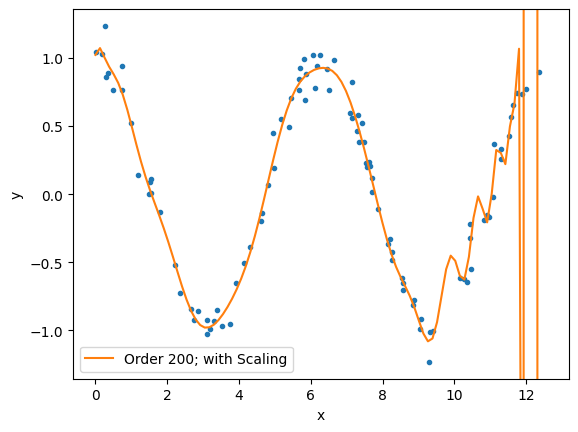

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

plt.plot(x, y, '.')
ylim = plt.ylim()

order = 200
X = np.array([x**i for i in range(1,order+1)]).T

lm = LinearRegression().fit (X, y)
lm_std = Pipeline( [('scaler', MinMaxScaler()), ('regression', LinearRegression())])
lm_std.fit (X, y)

xAxis = np.linspace(0.*np.pi, 4*np.pi, 100)
y_hat_std = lm_std.predict(np.array([xAxis**i for i in range(1,order+1)]).T)

plt.plot(xAxis, y_hat_std, label=f'Order {order}; with Scaling')

plt.xlabel("x")
plt.ylabel("y")

plt.ylim (ylim)

plt.legend()
plt.show()

## Conclusione
Il modello lineare è un modello statistico di regressione semplice e robusto. Non richiede minimizzazione numerica del gradiente poiché può essere risolto analiticamente e tradotto in un problema di inversione di matrice.

Possiamo generalizzare il modello lineare utilizzando come variabili indipendenti le potenze della variabile di input, ottenendo un modello polinomiale che ancora una volta non richiede minimizzazione numerica del gradiente. Tuttavia, passando dal modello lineare al modello polinomiale perdiamo la robustezza nelle estrapolazioni e possiamo incorrere in problemi di instabilità numerica e over-fitting, come in molti altri modelli di *machine-learning*.